In this file, we explore various tables but only in the context of store 44 and for the years 2013-2015

In [1]:
from pyspark import SparkContext
from pyspark import SQLContext
sc = SparkContext()
sqlContext = SQLContext(sc)
from pyspark.sql import SparkSession
sparkSession = SparkSession.builder.getOrCreate()

from pyspark.sql.functions import col, countDistinct
from pyspark.sql.functions import isnan, when, count, col


import matplotlib as plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
b, g, r, p = sns.color_palette("muted", 4)

<b>Explore file #1 stores.csv</b> <br/>
Exploration is not required sice we are taking only one store - 44

<b>Explore file #2 oil_2013_2015.csv</b>

In [3]:
sdfOil = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/oil_2013_2015.csv",header = True,inferSchema = True)

In [4]:
sdfOil.count()

783

In [7]:
sdfOil.show(10)

+-------------------+----------+
|               date|dcoilwtico|
+-------------------+----------+
|2013-01-01 00:00:00|      null|
|2013-01-02 00:00:00|     93.14|
|2013-01-03 00:00:00|     92.97|
|2013-01-04 00:00:00|     93.12|
|2013-01-07 00:00:00|      93.2|
|2013-01-08 00:00:00|     93.21|
|2013-01-09 00:00:00|     93.08|
|2013-01-10 00:00:00|     93.81|
|2013-01-11 00:00:00|      93.6|
|2013-01-14 00:00:00|     94.27|
+-------------------+----------+
only showing top 10 rows



In [8]:
sdfOil.agg(countDistinct(col("date")).alias("count")).show()
# date is the primary key as distinct count and total row count match

+-----+
|count|
+-----+
|  783|
+-----+



In [9]:
sdfOil.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfOil.columns]).show()

+----+----------+
|date|dcoilwtico|
+----+----------+
|   0|        27|
+----+----------+



In [10]:
sdfOil.describe().show()

+-------+------------------+
|summary|        dcoilwtico|
+-------+------------------+
|  count|               756|
|   mean| 79.93715608465612|
| stddev|24.086449423041056|
|    min|             34.55|
|    max|            110.62|
+-------+------------------+



In [11]:
sdfOil.approxQuantile("dcoilwtico", [0.5], 0.25)
#median

[52.99]

In [12]:
row1 = sdfOil.agg({"date": "max"}).collect()[0]
print row1["max(date)"]

2015-12-31 00:00:00


In [13]:
row2 = sdfOil.agg({"date": "min"}).collect()[0]
print row2["min(date)"]

2013-01-01 00:00:00


In [ ]:
# Timeseries Analysis

In [14]:
sdfOilDF = sdfOil.toPandas()

In [15]:
sdfOilDF['date'] = pd.to_datetime(sdfOilDF['date'])

In [16]:
sdfOilDF.index = sdfOilDF['date']
del sdfOilDF['date']

In [17]:
# what is the mean oil price per month starting 2013/01/1 to 2015/12/31
sdfOilDF.resample('M').mean()

,dcoilwtico
date,
2013-01-31,94.756667
2013-02-28,95.308947
2013-03-31,92.938500
2013-04-30,92.021364
2013-05-31,94.509545
2013-06-30,95.772500
2013-07-31,104.670909
2013-08-31,106.572727
2013-09-30,106.289500


In [18]:
# what is the mean oil price per year starting 2013/01/01 to 2015/12/31
sdfOilDF.resample('Y').mean()

,dcoilwtico
date,
2013-12-31,97.982540
2014-12-31,93.172222
2015-12-31,48.656706


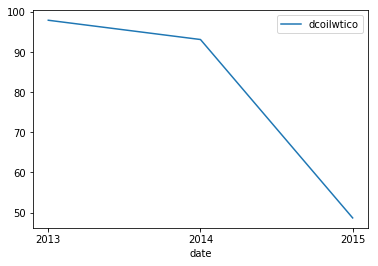

In [19]:
sdfOilDF.resample('Y').mean().plot()

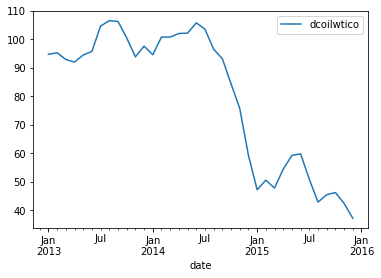

In [20]:
sdfOilDF.resample('M').mean().plot()

<b>Explore file #3 holidays_events_2013_2015.csv</b>

In [6]:
sdfHolidayEvents = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/holidays_events_2013_2015.csv",header = True,inferSchema = True)

In [3]:
sdfHolidayEvents.describe()

DataFrame[summary: string, type: string, locale: string, locale_name: string, description: string]

In [23]:
sdfHolidayEvents.show(10)

+-------------------+-------+--------+-----------+--------------------+-----------+
|               date|   type|  locale|locale_name|         description|transferred|
+-------------------+-------+--------+-----------+--------------------+-----------+
|2012-03-02 00:00:00|Holiday|   Local|      Manta|  Fundacion de Manta|      false|
|2012-04-01 00:00:00|Holiday|Regional|   Cotopaxi|Provincializacion...|      false|
|2012-04-12 00:00:00|Holiday|   Local|     Cuenca| Fundacion de Cuenca|      false|
|2012-04-14 00:00:00|Holiday|   Local|   Libertad|Cantonizacion de ...|      false|
|2012-04-21 00:00:00|Holiday|   Local|   Riobamba|Cantonizacion de ...|      false|
|2012-05-12 00:00:00|Holiday|   Local|       Puyo|Cantonizacion del...|      false|
|2012-06-23 00:00:00|Holiday|   Local|   Guaranda|Cantonizacion de ...|      false|
|2012-06-25 00:00:00|Holiday|Regional|   Imbabura|Provincializacion...|      false|
|2012-06-25 00:00:00|Holiday|   Local|  Latacunga|Cantonizacion de ...|     

In [9]:
sdfHolidayEvents.count()

170

In [7]:
sdfHolidayEvents.agg(countDistinct(col("date")).alias("count")).show()

+-----+
|count|
+-----+
|  155|
+-----+



In [8]:
sdfHolidayEvents.select("date").distinct().count()

155

In [10]:
sdfHolidayEvents.select("type").distinct().show()

+----------+
|      type|
+----------+
|     Event|
|   Holiday|
|  Transfer|
|    Bridge|
|Additional|
|  Work Day|
+----------+



In [11]:
minRow = sdfHolidayEvents.agg({"date": "min"}).collect()[0]
print minRow["min(date)"]

2013-01-01 00:00:00


In [12]:
maxRow = sdfHolidayEvents.agg({"date": "max"}).collect()[0]
print maxRow["max(date)"]

2015-12-31 00:00:00


In [13]:
sdfHolidayEvents.select("locale").distinct().show()

+--------+
|  locale|
+--------+
|National|
|   Local|
|Regional|
+--------+



In [14]:
sdfHolidayEvents.select("locale_name").distinct().count()

24

In [15]:
sdfHolidayEvents.select("date", "type", "locale_name").distinct().count()

170

In [16]:
sdfHolidayEvents.select("date", "type", "locale", "locale_name", "description", "transferred").distinct().count()
# All columns together form the PK

170

In [32]:
sdfHolidayEvents.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfHolidayEvents.columns]).show()

+----+----+------+-----------+-----------+-----------+
|date|type|locale|locale_name|description|transferred|
+----+----+------+-----------+-----------+-----------+
|   0|   0|     0|          0|          0|          0|
+----+----+------+-----------+-----------+-----------+



In [17]:
sdfHolidayEvents.select("date").distinct().count()

155

In [18]:
sdfHolidayEvents.select("date").distinct().show(5)

+-------------------+
|               date|
+-------------------+
|2015-09-28 00:00:00|
|2013-02-12 00:00:00|
|2013-10-11 00:00:00|
|2014-07-08 00:00:00|
|2013-04-29 00:00:00|
+-------------------+
only showing top 5 rows



In [19]:
sdfHolidayEvents.select("type").distinct().count()

6

In [20]:
sdfHolidayEvents.select("type").distinct().show(10)

+----------+
|      type|
+----------+
|     Event|
|   Holiday|
|  Transfer|
|    Bridge|
|Additional|
|  Work Day|
+----------+



In [38]:
sdfHolidayEvents.select("locale").distinct().count()

3

In [39]:
sdfHolidayEvents.select("locale").distinct().show(5)

+--------+
|  locale|
+--------+
|National|
|   Local|
|Regional|
+--------+



In [21]:
sdfHolidayEvents.select("locale_name").distinct().count()

24

In [22]:
sdfHolidayEvents.select("locale_name").distinct().show(5)

+-------------+
|  locale_name|
+-------------+
|      Quevedo|
|       Cuenca|
|     Cotopaxi|
|     Guaranda|
|Santo Domingo|
+-------------+
only showing top 5 rows



In [23]:
sdfHolidayEvents.select("description").distinct().count()

65

In [24]:
sdfHolidayEvents.select("description").distinct().show(5)

+--------------------+
|         description|
+--------------------+
|Independencia de ...|
|Fundacion de Esme...|
|        Black Friday|
|Traslado Independ...|
|Fundacion de Riob...|
+--------------------+
only showing top 5 rows



In [44]:
sdfHolidayEvents.select("transferred").distinct().count()

2

In [45]:
sdfHolidayEvents.select("transferred").distinct().show(5)

+-----------+
|transferred|
+-----------+
|       true|
|      false|
+-----------+



In [46]:
# Visual Data Analysis
sdfHolidayEventsDF = sdfHolidayEvents.toPandas()

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


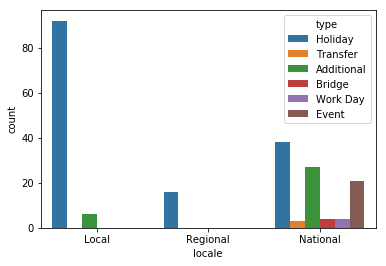

In [47]:
sns.countplot(x="locale",hue="type",data=sdfHolidayEventsDF)

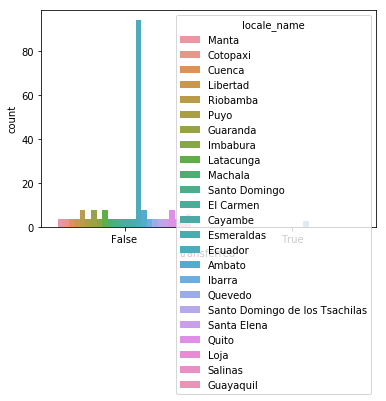

In [48]:
sns.countplot(x="transferred",hue="locale_name",data=sdfHolidayEventsDF)

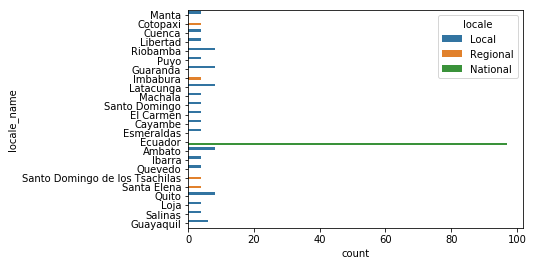

In [49]:
sns.countplot(y="locale_name",hue="locale",data=sdfHolidayEventsDF)

In [50]:
sdfHolidayEventsDF['date'] = pd.to_datetime(sdfHolidayEventsDF['date'])

In [51]:
sdfHolidayEventsDF.index = sdfHolidayEventsDF['date']
del sdfHolidayEventsDF['date']

/usr/local/anaconda/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


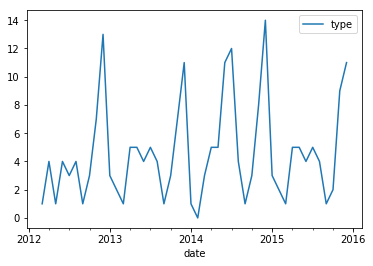

In [52]:
sdfHolidayEventsDF.resample('M',how={'type':'count'}).plot()

<b>Explore file #4 items_store44_2013_2015.csv</b>

In [26]:
sdfItems = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/items_store44_2013_2015.csv",header = True,inferSchema = True)

In [27]:
sdfItems.show(10)

+--------+------------+-----+----------+
|item_nbr|      family|class|perishable|
+--------+------------+-----+----------+
|  169028|   GROCERY I| 1040|         0|
|  269084|BREAD/BAKERY| 2720|         1|
|  368628|   BEVERAGES| 1122|         0|
|  517909|        DELI| 2690|         1|
|  587069|   GROCERY I| 1004|         0|
|  594045|BREAD/BAKERY| 2718|         1|
|  664537|   GROCERY I| 1026|         0|
|  764438|   GROCERY I| 1072|         0|
|  823245|BREAD/BAKERY| 2708|         1|
|  872309|   GROCERY I| 1034|         0|
+--------+------------+-----+----------+
only showing top 10 rows



In [28]:
sdfItems.count()

3104

In [32]:
sdfItems.describe().show()

+-------+------------------+----------+------------------+-------------------+
|summary|          item_nbr|    family|             class|         perishable|
+-------+------------------+----------+------------------+-------------------+
|  count|              3104|      3104|              3104|               3104|
|   mean|1106774.6211340206|      null| 2209.420425257732| 0.2503221649484536|
| stddev|  526905.238889525|      null|1497.7548181989926|0.43326834174349144|
|    min|             96995|AUTOMOTIVE|              1002|                  0|
|    max|           2037487|   SEAFOOD|              7780|                  1|
+-------+------------------+----------+------------------+-------------------+



In [29]:
sdfItems.select("item_nbr").distinct().count()
# item_nbr is the primary key as distinct count and total row count match

3104

In [58]:
sdfItems.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfItems.columns]).show()

+--------+------+-----+----------+
|item_nbr|family|class|perishable|
+--------+------+-----+----------+
|       0|     0|    0|         0|
+--------+------+-----+----------+



In [59]:
sdfItems.select("item_nbr").distinct().count()

3104

In [60]:
sdfItems.select("item_nbr").distinct().show(5)

+--------+
|item_nbr|
+--------+
|  454593|
|  459762|
|  692531|
|  699703|
|  759651|
+--------+
only showing top 5 rows



In [30]:
sdfItems.select("family").distinct().count()

31

In [62]:
sdfItems.select("family").distinct().show(10)

+-------------------+
|             family|
+-------------------+
|     PREPARED FOODS|
|         LADIESWEAR|
|HOME AND KITCHEN II|
|    LAWN AND GARDEN|
|          GROCERY I|
|            PRODUCE|
|         AUTOMOTIVE|
|          BEVERAGES|
|          HOME CARE|
|       BREAD/BAKERY|
+-------------------+
only showing top 10 rows



In [31]:
sdfItems.select("class").distinct().count()

307

In [64]:
sdfItems.select("class").distinct().show(5)

+-----+
|class|
+-----+
| 1088|
| 2142|
| 2122|
| 1084|
| 6393|
+-----+
only showing top 5 rows



In [33]:
sdfItems.approxQuantile("class", [0.5], 0.25)
#median

[1084.0]

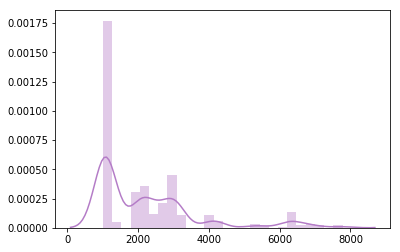

In [66]:
classes = sdfItems.select("class").collect()
sns.distplot(classes, color=p)

In [34]:
sdfItems.select("perishable").distinct().count()

2

In [68]:
sdfItems.select("perishable").distinct().show(5)

+----------+
|perishable|
+----------+
|         1|
|         0|
+----------+



In [69]:
sdfItemsDF= sdfItems.toPandas()

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


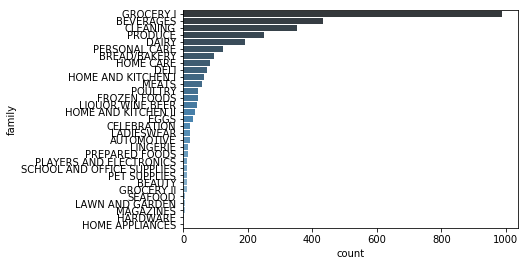

In [70]:
sns.countplot(y="family",data=sdfItemsDF,order = sdfItemsDF['family'].value_counts().index,palette="Blues_d")

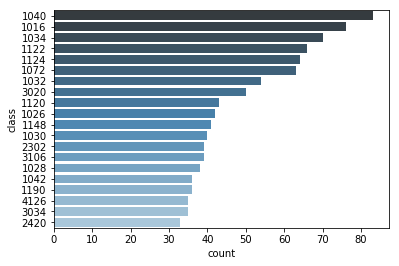

In [71]:
# Top 20 classes
sns.countplot(y="class",data=sdfItemsDF,order = sdfItemsDF['class'].value_counts().iloc[:20].index,palette="Blues_d")

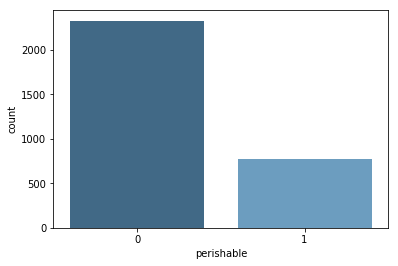

In [72]:
sns.countplot(x="perishable",data=sdfItemsDF,order = sdfItemsDF['perishable'].value_counts().index,palette="Blues_d")

<b>Explore file #5 transactions_store44.csv</b>

In [35]:
sdfTransactions = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/transactions_store44.csv",header = True,inferSchema = True)

In [36]:
sdfTransactions.show(10)

+-------------------+---------+------------+
|               date|store_nbr|transactions|
+-------------------+---------+------------+
|2013-01-02 00:00:00|       44|        4821|
|2013-01-03 00:00:00|       44|        3618|
|2013-01-04 00:00:00|       44|        4169|
|2013-01-05 00:00:00|       44|        4921|
|2013-01-06 00:00:00|       44|        4925|
|2013-01-07 00:00:00|       44|        3871|
|2013-01-08 00:00:00|       44|        3593|
|2013-01-09 00:00:00|       44|        4006|
|2013-01-10 00:00:00|       44|        3323|
|2013-01-11 00:00:00|       44|        3873|
+-------------------+---------+------------+
only showing top 10 rows



In [37]:
sdfTransactions.count()

1089

In [38]:
sdfTransactions.select("date", "store_nbr").distinct().count()
# date, store_nbr together form the primary key as distinct count and total row count match

1089

In [77]:
sdfTransactions.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfTransactions.columns]).show()

+----+---------+------------+
|date|store_nbr|transactions|
+----+---------+------------+
|   0|        0|           0|
+----+---------+------------+



In [78]:
sdfTransactions.select("date").distinct().count()

1089

In [79]:
sdfTransactions.select("date").distinct().show(5)

+-------------------+
|               date|
+-------------------+
|2013-10-31 00:00:00|
|2014-08-04 00:00:00|
|2015-04-26 00:00:00|
|2015-07-14 00:00:00|
|2015-10-10 00:00:00|
+-------------------+
only showing top 5 rows



In [7]:
minRow = sdfTransactions.agg({"date": "min"}).collect()[0]
print minRow["min(date)"]

2013-01-02 00:00:00


In [8]:
maxRow = sdfTransactions.agg({"date": "max"}).collect()[0]
print maxRow["max(date)"]

2015-12-31 00:00:00


In [80]:
sdfTransactions.select("store_nbr").distinct().count()

1

In [81]:
sdfTransactions.select("store_nbr").distinct().show(5)

+---------+
|store_nbr|
+---------+
|       44|
+---------+



In [41]:
sdfTransactions.select("transactions").distinct().count()

851

In [40]:
sdfTransactions.select("transactions").distinct().show(5)

+------------+
|transactions|
+------------+
|        3175|
|        4935|
|        4158|
|        4219|
|        3704|
+------------+
only showing top 5 rows



In [42]:
sdfTransactions.approxQuantile("transactions", [0.5], 0.25)
#median

[3797.0]

In [43]:
sdfTransactions.describe().show()

+-------+---------+-----------------+
|summary|store_nbr|     transactions|
+-------+---------+-----------------+
|  count|     1089|             1089|
|   mean|     44.0| 4325.12580348944|
| stddev|      0.0|749.3001058861494|
|    min|       44|             2333|
|    max|       44|             8359|
+-------+---------+-----------------+



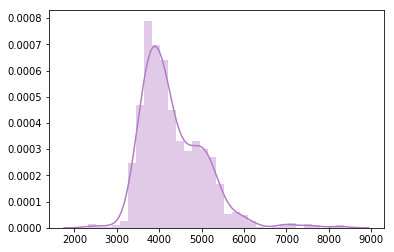

In [44]:
trans = sdfTransactions.select("transactions").collect()
sns.distplot(trans, color=p)

In [86]:
minRow = sdfTransactions.agg({"date": "min"}).collect()[0]
print minRow["min(date)"]

2013-01-02 00:00:00


In [87]:
maxRow = sdfTransactions.agg({"date": "max"}).collect()[0]
print maxRow["max(date)"]

2015-12-31 00:00:00


In [88]:
sdfTransactions.filter(sdfTransactions.store_nbr == 44).show()

+-------------------+---------+------------+
|               date|store_nbr|transactions|
+-------------------+---------+------------+
|2013-01-02 00:00:00|       44|        4821|
|2013-01-03 00:00:00|       44|        3618|
|2013-01-04 00:00:00|       44|        4169|
|2013-01-05 00:00:00|       44|        4921|
|2013-01-06 00:00:00|       44|        4925|
|2013-01-07 00:00:00|       44|        3871|
|2013-01-08 00:00:00|       44|        3593|
|2013-01-09 00:00:00|       44|        4006|
|2013-01-10 00:00:00|       44|        3323|
|2013-01-11 00:00:00|       44|        3873|
|2013-01-12 00:00:00|       44|        4423|
|2013-01-13 00:00:00|       44|        4676|
|2013-01-14 00:00:00|       44|        3450|
|2013-01-15 00:00:00|       44|        3527|
|2013-01-16 00:00:00|       44|        4026|
|2013-01-17 00:00:00|       44|        3412|
|2013-01-18 00:00:00|       44|        3801|
|2013-01-19 00:00:00|       44|        4656|
|2013-01-20 00:00:00|       44|        4732|
|2013-01-2

In [89]:
sdfTransactions.filter(sdfTransactions.store_nbr == 44).count()

1089

In [91]:
sdfTransactionsDF = sdfTransactions.toPandas()

In [92]:
sdfTransactionsDF['date'] = pd.to_datetime(sdfTransactionsDF['date'])

In [93]:
sdfTransactionsDF.index = sdfTransactionsDF['date']

In [94]:
del sdfTransactionsDF['date']

/usr/local/anaconda/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


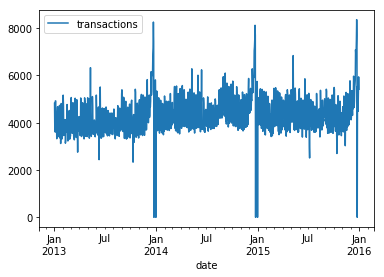

In [95]:
# Daywise transaction count
sdfTransactionsDF.resample('D',how={'transactions':'sum'}).plot()

/usr/local/anaconda/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


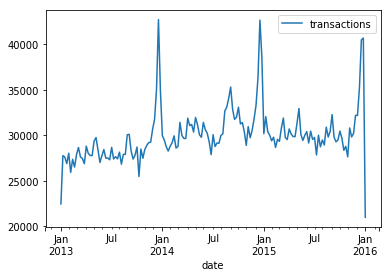

In [96]:
# Weekwise transaction count
sdfTransactionsDF.resample('W',how={'transactions':'sum'}).plot()

In [97]:
Transactions2013 = sdfTransactionsDF['2013'].groupby('store_nbr').resample('Y',how={'transactions':'sum'})

/usr/local/anaconda/python2/lib/python2.7/site-packages/pandas/core/groupby.py:1324: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  return get_resampler_for_grouping(self, rule, *args, **kwargs)


In [98]:
Transactions2014 = sdfTransactionsDF['2014'].groupby('store_nbr').resample('Y',how={'transactions':'sum'})

In [99]:
Transactions2015 = sdfTransactionsDF['2015'].groupby('store_nbr').resample('Y',how={'transactions':'sum'})

In [100]:
# Top 10 stores which made huge transactions
Transactions2013.sort_values('transactions',ascending=False).head(10)

,,transactions
store_nbr,date,
44,2013-12-31,1493932


In [101]:
# Top 10 stores which made huge transactions
Transactions2014.sort_values('transactions',ascending=False).head(10)

,,transactions
store_nbr,date,
44,2014-12-31,1622607


In [102]:
# Top 10 stores which made huge transactions
Transactions2015.sort_values('transactions',ascending=False).head(10)

,,transactions
store_nbr,date,
44,2015-12-31,1593523


<b>Explore  file #6 sample_submission.csv</b><br/>
Exploration is not required sice we are taking only one store - 44 and will be predicting for data in 2015.

<b>Explore file #7 test.csv</b><br/>
Exploration is not required sice we are taking only one store - 44 and will be predicting for data in 2015.

<b>Explore file #8 train_store44.csv </b>

In [45]:
sdfTrain = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/train_store44.csv",header = True,inferSchema = True)

In [46]:
sdfTrain.show(10)

+-----+-------------------+---------+--------+----------+-----------+
|   id|               date|store_nbr|item_nbr|unit_sales|onpromotion|
+-----+-------------------+---------+--------+----------+-----------+
|32292|2013-01-02 00:00:00|       44|  103520|      12.0|       null|
|32293|2013-01-02 00:00:00|       44|  103665|      20.0|       null|
|32294|2013-01-02 00:00:00|       44|  105574|      51.0|       null|
|32295|2013-01-02 00:00:00|       44|  105575|      74.0|       null|
|32296|2013-01-02 00:00:00|       44|  105577|      23.0|       null|
|32297|2013-01-02 00:00:00|       44|  105693|       4.0|       null|
|32298|2013-01-02 00:00:00|       44|  105737|      45.0|       null|
|32299|2013-01-02 00:00:00|       44|  105857|      57.0|       null|
|32300|2013-01-02 00:00:00|       44|  106716|       7.0|       null|
|32301|2013-01-02 00:00:00|       44|  108079|       5.0|       null|
+-----+-------------------+---------+--------+----------+-----------+
only showing top 10 

In [106]:
sdfTrain.count()

1913387

In [107]:
sdfTrain.select("id").distinct().count()
# id is the primary key as distinct count and total row count match

1913387

In [108]:
sdfTrain.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfTrain.columns]).show()

+---+----+---------+--------+----------+-----------+
| id|date|store_nbr|item_nbr|unit_sales|onpromotion|
+---+----+---------+--------+----------+-----------+
|  0|   0|        0|       0|         0|     649721|
+---+----+---------+--------+----------+-----------+



In [110]:
minRowTrain = sdfTrain.agg({"date": "min"}).collect()[0]
print minRowTrain["min(date)"]

2013-01-02 00:00:00


In [111]:
maxRowTrain = sdfTrain.agg({"date": "max"}).collect()[0]
print maxRowTrain["max(date)"]

2015-12-31 00:00:00


In [112]:
sdfTrain.select("onpromotion").distinct().count()

3

In [113]:
sdfTrain.select("onpromotion").distinct().show(10)

+-----------+
|onpromotion|
+-----------+
|       null|
|       true|
|      false|
+-----------+



In [114]:
sdfTrain.describe().show()

+-------+--------------------+--------------------+-----------------+-----------------+
|summary|                  id|           store_nbr|         item_nbr|       unit_sales|
+-------+--------------------+--------------------+-----------------+-----------------+
|  count|             1913387|             1913387|          1913387|          1913387|
|   mean|3.2444040060134202E7|                44.0|847920.4138692277|18.41339533173389|
| stddev| 1.909390693754702E7|3.221893743654590...|439503.7729726517|41.98475192015884|
|    min|               32292|                  44|            96995|          -1806.0|
|    max|            66439180|                  44|          2037487|           8009.0|
+-------+--------------------+--------------------+-----------------+-----------------+



In [109]:
sdfTrain.approxQuantile("unit_sales", [0.5], 0.25)
#median

[10.0]

In [115]:
print(type(sdfTrain))

<class 'pyspark.sql.dataframe.DataFrame'>


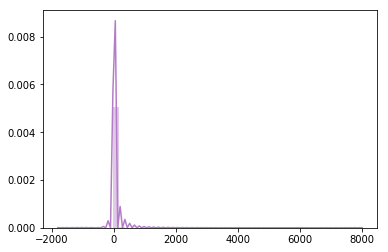

In [116]:
unit_sales = sdfTrain.select("unit_sales").collect()
sns.distplot(unit_sales, color=p)

In [11]:
sqlContext.registerDataFrameAsTable(sdfTrain, "sdfTraintbl")

In [13]:
sqlContext.sql("select count(distinct item_nbr)  from sdfTraintbl").show()

+------------------------+
|count(DISTINCT item_nbr)|
+------------------------+
|                    3104|
+------------------------+



In [6]:
sdfTrain_2013 = sqlContext.sql("select *  from sdfTraintbl where date < '2014-01-01 00:00:00'")

In [7]:
sdfTrain_2013.describe().show()

+-------+------------------+---------+-----------------+------------------+
|summary|                id|store_nbr|         item_nbr|        unit_sales|
+-------+------------------+---------+-----------------+------------------+
|  count|            490565|   490565|           490565|            490565|
|   mean| 8147906.823854127|     44.0|667409.3862750095|16.974961517841624|
| stddev|4721717.3137169825|      0.0|324248.2978496713| 42.44433576403105|
|    min|             32292|       44|            96995|             -41.0|
|    max|          16312338|       44|          1247036|            6010.0|
+-------+------------------+---------+-----------------+------------------+



In [8]:
sdfTrain_2013.approxQuantile("unit_sales", [0.5], 0.25)
#median

[10.0]

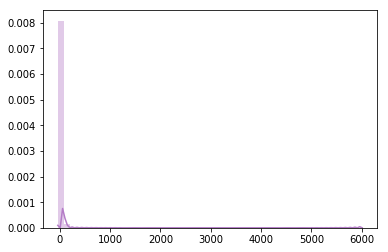

In [9]:
unit_sales_2013 = sdfTrain_2013.select("unit_sales").collect()
sns.distplot(unit_sales_2013, color=p)

In [10]:
sdfTrain_2014 = sqlContext.sql("select *  from sdfTraintbl where date >= '2014-01-01 00:00:00' and date < '2015-01-01 00:00:00'")

In [11]:
sdfTrain_2014.describe().show()

+-------+-------------------+---------+------------------+-----------------+
|summary|                 id|store_nbr|          item_nbr|       unit_sales|
+-------+-------------------+---------+------------------+-----------------+
|  count|             657633|   657633|            657633|           657633|
|   mean|2.739485696412893E7|     44.0| 863517.4424306566|20.34601231173009|
| stddev|  6418209.431418302|      0.0|431977.87520716176|45.28781190365764|
|    min|           16375625|       44|             96995|            -36.0|
|    max|           38577787|       44|           1909770|         6025.771|
+-------+-------------------+---------+------------------+-----------------+



In [12]:
sdfTrain_2014.approxQuantile("unit_sales", [0.5], 0.25)
#median

[10.0]

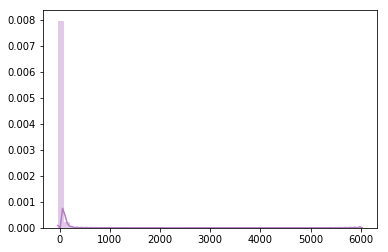

In [13]:
unit_sales_2014 = sdfTrain_2014.select("unit_sales").collect()
sns.distplot(unit_sales_2014, color=p)

In [14]:
sdfTrain_2015 = sqlContext.sql("select *  from sdfTraintbl where date >= '2015-01-01 00:00:00' and date < '2016-01-01 00:00:00'")

In [15]:
sdfTrain_2015.describe().show()

+-------+-------------------+---------+------------------+-----------------+
|summary|                 id|store_nbr|          item_nbr|       unit_sales|
+-------+-------------------+---------+------------------+-----------------+
|  count|             765189|   765189|            765189|           765189|
|   mean|5.235982822231501E7|     44.0| 950241.8946639327|17.67461390845924|
| stddev|  8059168.696894901|      0.0|472933.70585664443| 38.5359330510908|
|    min|           38641037|       44|             99197|          -1806.0|
|    max|           66439180|       44|           2037487|           8009.0|
+-------+-------------------+---------+------------------+-----------------+



In [16]:
sdfTrain_2015.approxQuantile("unit_sales", [0.5], 0.25)
#median

[9.0]

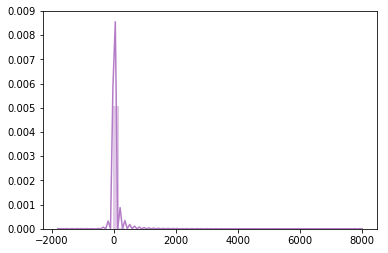

In [17]:
unit_sales_2015 = sdfTrain_2015.select("unit_sales").collect()
sns.distplot(unit_sales_2015, color=p)

In [ ]:
#-------------------------

In [118]:
sdfTrainTbl2014 = sqlContext.sql("SELECT store_nbr as store_nbr,year(date) as date,count(item_nbr) as count_item_nbr,(sum(unit_sales)*count(item_nbr)) as total_sales from sdfTraintbl where year(date) ='2014' group by store_nbr,year(date)")

In [119]:
sdfTrainTbl2015 = sqlContext.sql("SELECT store_nbr as store_nbr,year(date) as date,count(item_nbr) as count_item_nbr,(sum(unit_sales)*count(item_nbr)) as total_sales from sdfTraintbl where year(date) ='2015' group by store_nbr,year(date)")

In [120]:
sdfTrainTbl2013 = sqlContext.sql("SELECT store_nbr as store_nbr,year(date) as date,count(item_nbr) as count_item_nbr,(sum(unit_sales)*count(item_nbr)) as total_sales from sdfTraintbl where year(date) ='2013' group by store_nbr,year(date)")

In [121]:
sdfTrainTbl2013.show(10)

+---------+----+--------------+--------------------+
|store_nbr|date|count_item_nbr|         total_sales|
+---------+----+--------------+--------------------+
|       44|2013|        490565|4.085092715458293...|
+---------+----+--------------+--------------------+



In [122]:
sdfTrainTbl2014.show(10)

+---------+----+--------------+--------------------+
|store_nbr|date|count_item_nbr|         total_sales|
+---------+----+--------------+--------------------+
|       44|2014|        657633|8.799267060661738E12|
+---------+----+--------------+--------------------+



In [123]:
sdfTrainTbl2015.show(10)

+---------+----+--------------+--------------------+
|store_nbr|date|count_item_nbr|         total_sales|
+---------+----+--------------+--------------------+
|       44|2015|        765189|1.034873752403685E13|
+---------+----+--------------+--------------------+



In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrainTbl2013.toPandas()['total_sales'])]
iplot(data)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrainTbl2014.toPandas()['total_sales'])]
iplot(data)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrainTbl2015.toPandas()['total_sales'])]
iplot(data)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrainTbl2016.toPandas()['total_sales'])]
iplot(data)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrainTbl2017.toPandas()['total_sales'])]
iplot(data)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrain.toPandas()['item_nbr'])]
iplot(data)

<b>Check relatioship between train and stores, items </b>

In [127]:
sdfItems.createOrReplaceTempView("vwItems")

In [128]:
sdfTrain.createOrReplaceTempView("vwTrain")

In [129]:
sparkSession.sql('select count(distinct vwTrain.item_nbr)  from vwItems, vwTrain where vwItems.item_nbr = vwTrain.item_nbr').show()

+------------------------+
|count(DISTINCT item_nbr)|
+------------------------+
|                    3104|
+------------------------+

